[0]	validation_0-logloss:0.59135	validation_1-logloss:0.62291
[1]	validation_0-logloss:0.52201	validation_1-logloss:0.57855
[2]	validation_0-logloss:0.46324	validation_1-logloss:0.53822
[3]	validation_0-logloss:0.41242	validation_1-logloss:0.50522
[4]	validation_0-logloss:0.37203	validation_1-logloss:0.47906


C:\Users\maidu\.conda\envs\tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[5]	validation_0-logloss:0.34117	validation_1-logloss:0.45538
[6]	validation_0-logloss:0.31263	validation_1-logloss:0.43821
[7]	validation_0-logloss:0.28817	validation_1-logloss:0.42351
[8]	validation_0-logloss:0.26831	validation_1-logloss:0.40886
[9]	validation_0-logloss:0.25296	validation_1-logloss:0.39517
[10]	validation_0-logloss:0.23563	validation_1-logloss:0.38356
[11]	validation_0-logloss:0.21897	validation_1-logloss:0.37000
[12]	validation_0-logloss:0.20026	validation_1-logloss:0.35480
[13]	validation_0-logloss:0.18666	validation_1-logloss:0.34446
[14]	validation_0-logloss:0.17134	validation_1-logloss:0.33251
[15]	validation_0-logloss:0.16181	validation_1-logloss:0.32547
[16]	validation_0-logloss:0.15253	validation_1-logloss:0.31696
[17]	validation_0-logloss:0.14330	validation_1-logloss:0.30911
[18]	validation_0-logloss:0.13489	validation_1-logloss:0.30228
[19]	validation_0-logloss:0.12627	validation_1-logloss:0.29290
[20]	validation_0-logloss:0.11748	validation_1-logloss:0.287

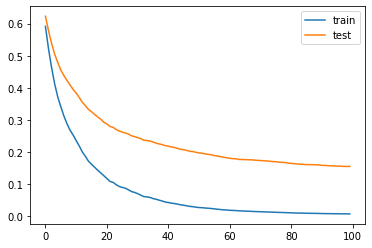

In [6]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

# define the model
model = XGBClassifier()

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

# retrieve performance metrics
results = model.evals_result()

# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()